# Projeto Estatística Descritiva de Dados
## Lucas Natan Correia Couri e Mariama Oliveira

# Análise exploratória

In [484]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [485]:
dados = pd.read_csv("dataset_stroke.csv")

In [486]:
dados.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [487]:
dados.shape

(5110, 12)

## Pré-processamento de dados

In [488]:
dados.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Convertendos tipos "object" para "category"

In [489]:
dados['gender'] = dados['gender'].astype('category')
dados['ever_married'] = dados['ever_married'].astype('category')
dados['work_type'] = dados['work_type'].astype('category')
dados['Residence_type'] = dados['Residence_type'].astype('category')
dados['smoking_status'] = dados['smoking_status'].astype('category')
dados['hypertension'] = dados['hypertension'].astype('category')
dados['heart_disease'] = dados['heart_disease'].astype('category')
dados['stroke'] = dados['stroke'].astype('category')


In [490]:
dados[(dados['age']<2) & (dados['stroke']==0)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,7559,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
376,22706,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0
562,45238,Female,1.80,0,0,No,children,Urban,58.26,16.5,Unknown,0
564,61511,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
597,40639,Female,1.08,0,0,No,children,Rural,60.53,17.5,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4934,32147,Male,1.32,0,0,No,children,Rural,107.02,NaN,Unknown,0
5032,67426,Female,1.24,0,0,No,children,Rural,61.94,20.3,Unknown,0
5079,42709,Male,1.72,0,0,No,children,Urban,77.28,17.1,Unknown,0
5089,56714,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0


In [491]:
dados.describe()

,id,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,4909.000000
mean,36517.829354,43.226614,106.147677,28.893237
std,21161.721625,22.612647,45.283560,7.854067
min,67.000000,0.080000,55.120000,10.300000
25%,17741.250000,25.000000,77.245000,23.500000
50%,36932.000000,45.000000,91.885000,28.100000
75%,54682.000000,61.000000,114.090000,33.100000
max,72940.000000,82.000000,271.740000,97.600000


<AxesSubplot:>

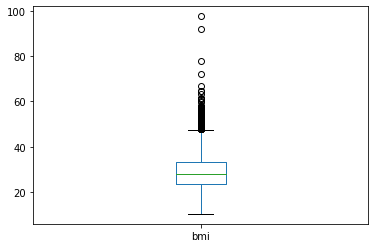

In [492]:
dados['bmi'].plot.box()

### **Verificando dados nulos**

In [493]:
dados.isnull().sum()/len(dados)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [494]:
dados['gender'].value_counts() 
dados['ever_married'].value_counts()
dados['work_type'].value_counts()
dados['Residence_type'].value_counts()
dados['smoking_status'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Yes    3353
No     1757
Name: ever_married, dtype: int64

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [495]:
dados[['hypertension', 'heart_disease','stroke']].apply(pd.Series.value_counts)

,hypertension,heart_disease,stroke
0,4612,4834,4861
1,498,276,249


In [496]:
dados[(dados['bmi'].isnull()) & (dados['stroke']==1)].shape

(40, 12)

In [497]:
dados[(dados['stroke']==1)].shape

(249, 12)

### Iremos retirar as instâncias que apresentam valores nulos para bmi (IMC). Futuramente, iremos comparar se caso esse atributo for inputado, o classificador apresentará uma melhor performance.

In [498]:
dados.dropna(inplace = True)

In [499]:
dados[dados.duplicated()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [500]:
dados[ ( dados['smoking_status']=="Unknown" ) & ( dados['stroke']==1 ) ].shape

(29, 12)

In [501]:
#dados.shape #4909
dados = dados[dados['smoking_status']!="Unknown"]

# Análise

Verificando distribuição dos atributos

In [502]:
# ax = sns.countplot(x="stroke", data=dados)
#ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)


In [503]:
#dados['hypertension'] 
#dados['heart_disease']
#dados['stroke']
dados[['hypertension', 'heart_disease','stroke']].apply(pd.Series.value_counts)

,hypertension,heart_disease,stroke
0,3018,3220,3246
1,408,206,180


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

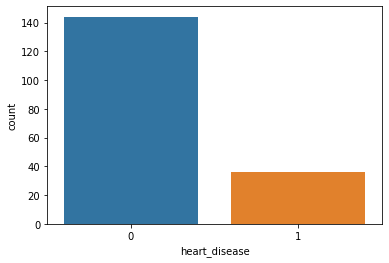

In [504]:
sns.countplot(x="heart_disease", data=dados[dados['stroke']==1])

In [505]:
### Fazer os graficos para as categoricas (4 plots por janela)
### Fazer os graficos para as categoricas apenas para stroke==1

<AxesSubplot:xlabel='age', ylabel='Count'>

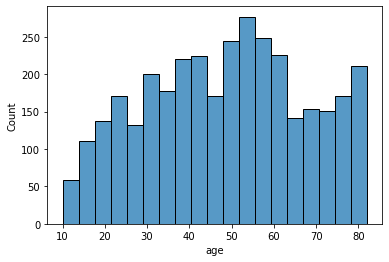

In [506]:
sns.histplot(data=dados, x="age")

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

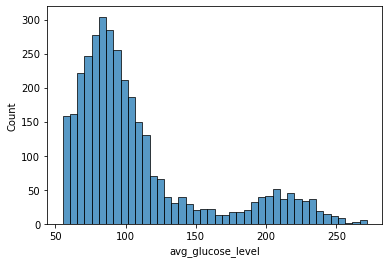

In [507]:
sns.histplot(data=dados, x="avg_glucose_level")

<AxesSubplot:xlabel='bmi', ylabel='Count'>

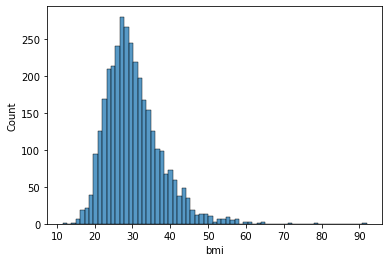

In [508]:
sns.histplot(data=dados, x="bmi")

<AxesSubplot:xlabel='age', ylabel='bmi'>

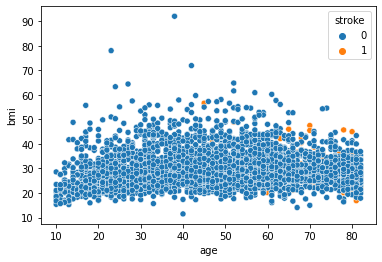

In [509]:
sns.scatterplot(data=dados, x="age", y="bmi", hue=dados['stroke'])

<AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>

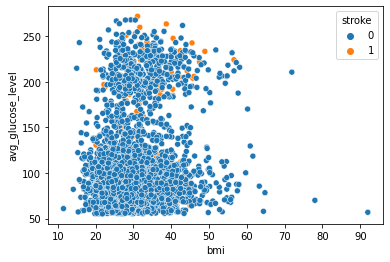

In [510]:
sns.scatterplot(data=dados, x="bmi", y="avg_glucose_level", hue=dados['stroke'])

In [511]:
dados.corr(method='pearson')

,id,age,avg_glucose_level,bmi
id,1.000000,-0.003491,0.004326,-0.003862
age,-0.003491,1.000000,0.233649,0.079666
avg_glucose_level,0.004326,0.233649,1.000000,0.156404
bmi,-0.003862,0.079666,0.156404,1.000000


## Discretizando variáveis contínuas

In [512]:
dados['faixaIdade'] = pd.cut(dados['age'], [0, 10, 25, 50, 75, 90])

In [513]:
dados['faixaIMC'] = pd.cut(dados['bmi'], [0, 18.5, 25, 30, 40, 100])

In [514]:
dados['faixaGlicose'] = pd.cut(dados['avg_glucose_level'], [0, 70, 100, 125, 300])
#https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2380

In [515]:
dados['faixaIdade'] = dados['faixaIdade'].astype('category')
dados['faixaIMC'] = dados['faixaIMC'].astype('category')
dados['faixaGlicose'] = dados['faixaGlicose'].astype('category')

# Classificador Naive Bayes

## Com scikit

Separando em dados de treinamento e teste

In [516]:
X = dados.select_dtypes(include=['category'])
X = X.drop(columns='stroke')

y = dados['stroke']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



Codificando as variáveis

In [517]:
cat_columns = X.select_dtypes(['category']).columns
X[cat_columns] = X[cat_columns].apply(lambda x: x.cat.codes)

In [518]:
X

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,faixaIdade,faixaIMC,faixaGlicose
0,1,0,1,1,2,1,1,3,3,3
2,1,0,1,1,2,0,2,4,3,2
3,0,0,0,1,2,1,3,2,3,3
4,0,1,0,1,3,0,2,4,1,3
5,1,0,0,1,2,1,1,4,2,3
...,...,...,...,...,...,...,...,...,...,...
5100,1,1,0,1,3,0,2,4,2,1
5102,0,0,0,1,2,0,2,3,1,1
5106,0,0,0,1,3,1,2,4,3,3
5107,0,0,0,1,3,0,2,2,3,1


In [519]:
# gender
X['gender'] = X['gender'].map({
'Male': int(0),
'Female':int(1),
'Other':int(2)})

# ever_married
X['ever_married'] = X['ever_married'].map({
'Yes':int(1), 
'No':int(0)})

# work_type
X['work_type'] = X['work_type'].map({
'Private':int(3), 
'Self-employed':int(4),
'Govt_job':int(2), 
'children':int(1), 
'Never_worked':int(0)})

# Residence_type
X['Residence_type'] = X['Residence_type'].map({
'Urban':int(2), 
'Rural':int(1)})

# smoking_status
X['smoking_status'] = X['smoking_status'].map({
'formerly smoked':int(1),
'never smoked':int(2), 
'smokes':int(3),
'Unknown':int(0)})

X['faixaIdade'] = X['faixaIdade'].astype('category').cat.codes
X['faixaIMC'] = X['faixaIMC'].astype('category').cat.codes
X

# X['faixaIdade'] = X['faixaIdade'].map({
#     '(0, 10]' : int(1),
#     '(10, 25]' : int(2),
#     '(25, 50]' : int(3),
#     '(50, 75]' : int(4),
#     '(75, 90]' : int(5)
# })

# # Faixa de IMC
# X['faixaIMC'] = X['faixaIMC'].map({
#     '(0.0, 18.5] ' : int(1),
#     '(18.5, 25.0]' : int(2),
#     '(25.0, 30.0]' : int(3),
#     '(30.0, 40.0]': int(4),
#     '(40.0, 100.0]' : int(5)
# })

# # Faixa de glicose
# X['faixaGlicose'] = X['faixaGlicose'].map({
#     '(0, 70]' : int(1),
#     '(70, 100]' : int(2),
#     '(100, 125] ' : int(3),
#     '(125, 300]' : int(4)
# }) 

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,faixaIdade,faixaIMC,faixaGlicose
0,NaN,0,1,NaN,NaN,NaN,NaN,3,3,3
2,NaN,0,1,NaN,NaN,NaN,NaN,4,3,2
3,NaN,0,0,NaN,NaN,NaN,NaN,2,3,3
4,NaN,1,0,NaN,NaN,NaN,NaN,4,1,3
5,NaN,0,0,NaN,NaN,NaN,NaN,4,2,3
...,...,...,...,...,...,...,...,...,...,...
5100,NaN,1,0,NaN,NaN,NaN,NaN,4,2,1
5102,NaN,0,0,NaN,NaN,NaN,NaN,3,1,1
5106,NaN,0,0,NaN,NaN,NaN,NaN,4,3,3
5107,NaN,0,0,NaN,NaN,NaN,NaN,2,3,1


In [520]:
y = dados['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [521]:
X_train.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,faixaIdade,faixaIMC,faixaGlicose
4022,NaN,1,0,NaN,NaN,NaN,NaN,4,3,3
4324,NaN,0,0,NaN,NaN,NaN,NaN,4,3,3
1444,NaN,0,0,NaN,NaN,NaN,NaN,1,0,2
663,NaN,0,0,NaN,NaN,NaN,NaN,2,1,1
1624,NaN,0,0,NaN,NaN,NaN,NaN,3,2,0


In [522]:
# With sklearn
ctgrclNB = CategoricalNB(alpha=1)
ctgrclNB.fit(X_train, y_train)
ctgrclNB.predict_proba(X_test)

ValueError: Input contains NaN, infinity or a value too large for 'int'.

## Sem scikit